HOUSING PRICE PREDICTION ML MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/ASUS/OneDrive - Manipal Education (MENA) FZ LLC/Desktop/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

X= data.drop(['median_house_value'], axis=1)
y=data['median_house_value']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

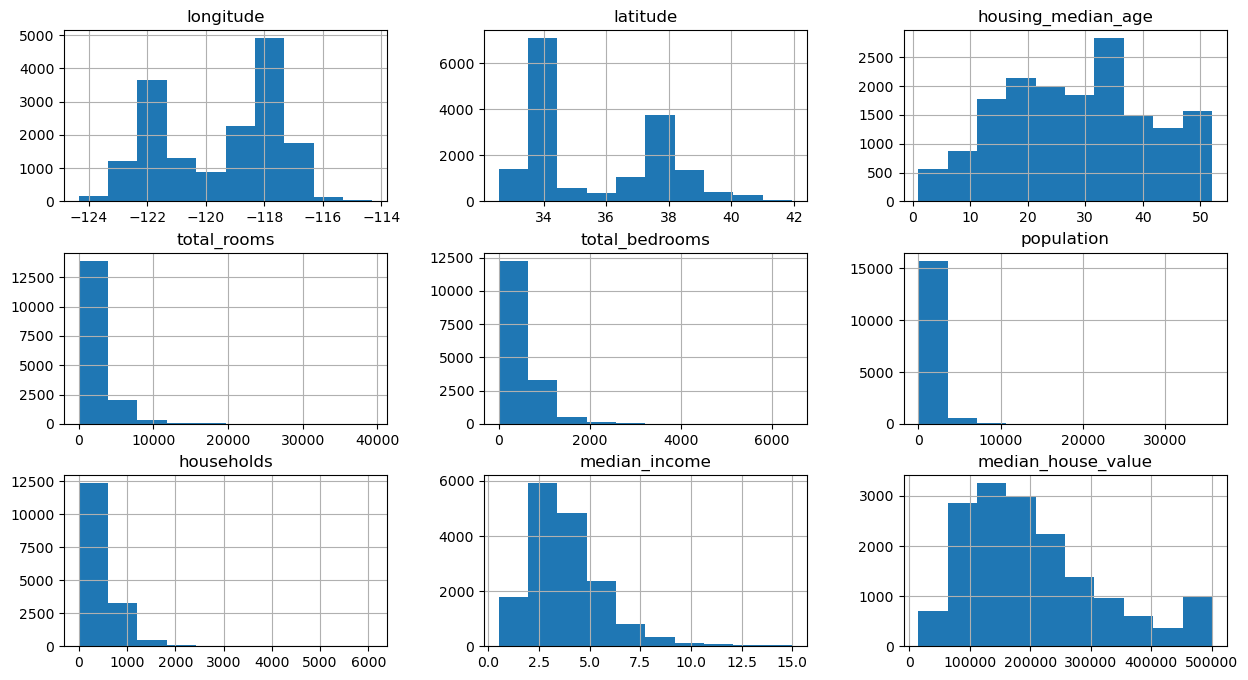

In [6]:
train_data = X_train.join(y_train)
train_data
train_data.hist(figsize=(15,8))

<Axes: >

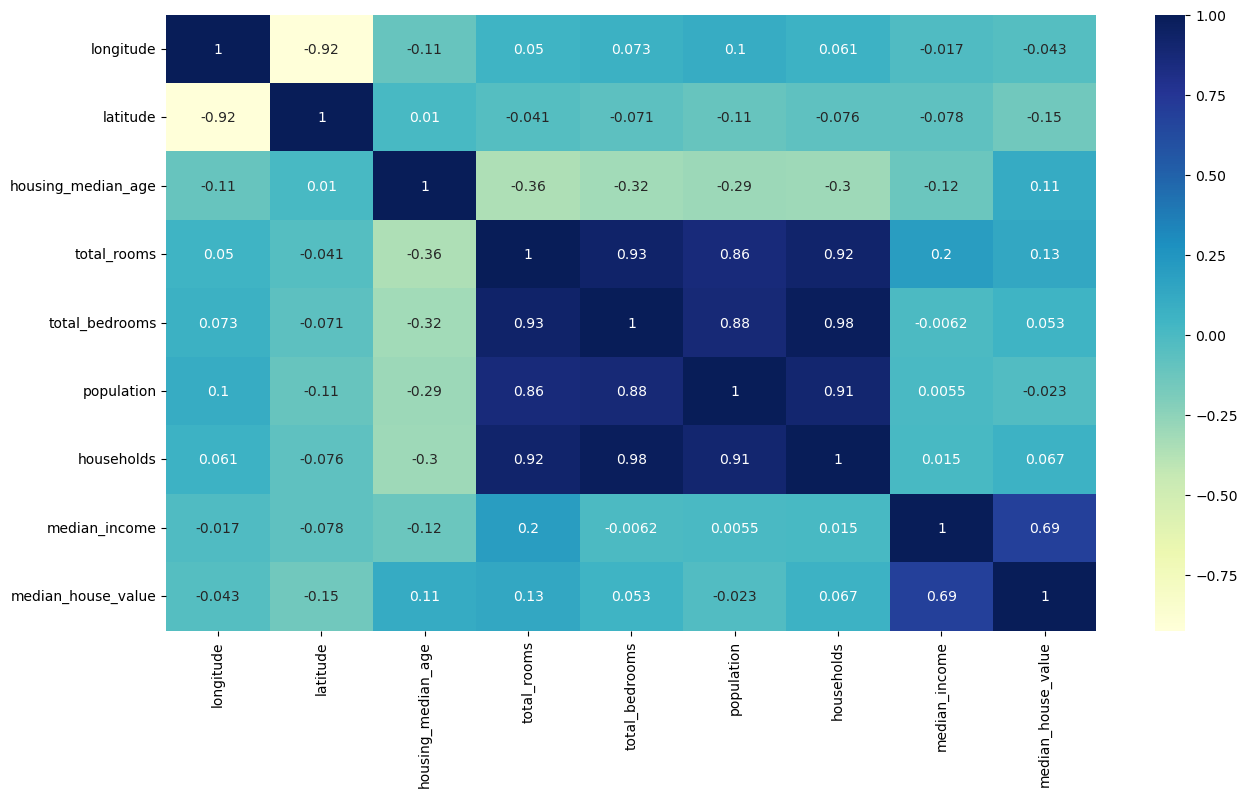

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

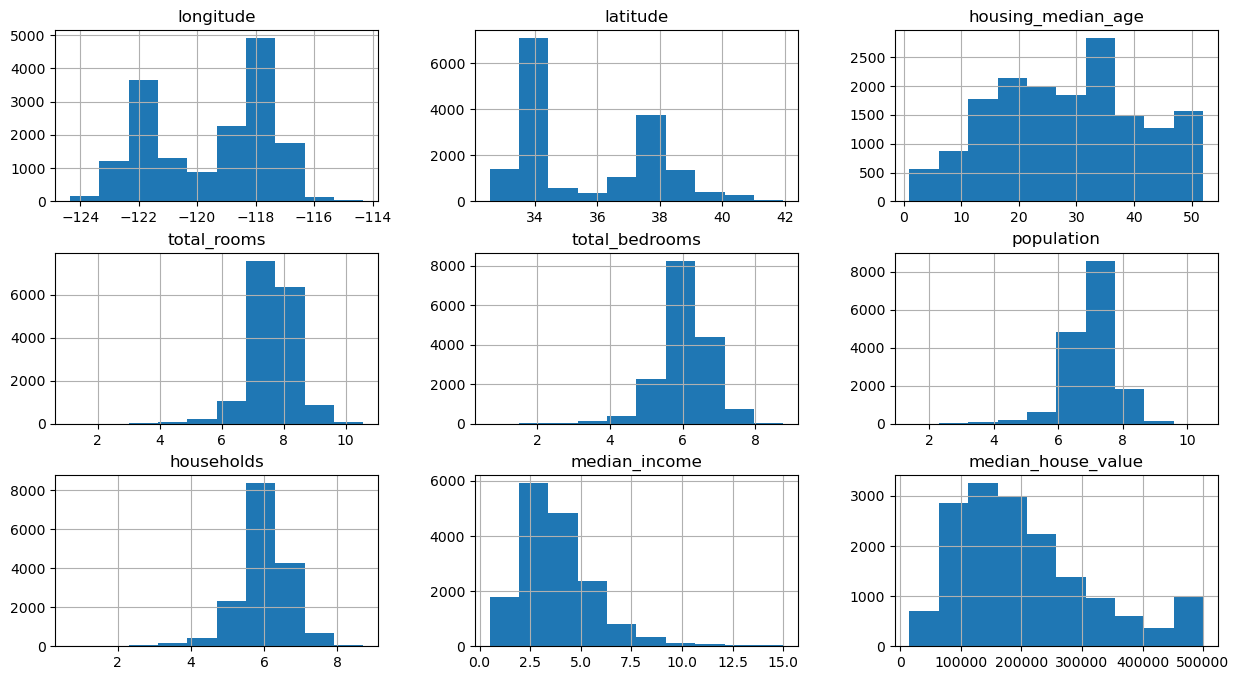

In [8]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

train_data.hist(figsize=(15,8))

In [9]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19266,-122.72,38.44,52.0,5.241747,4.143135,5.710427,4.290459,0.9437,129200.0,1,0,0,0,0
970,-121.89,37.67,19.0,7.618251,5.666427,6.748760,5.690359,6.5285,300400.0,0,1,0,0,0
6549,-118.02,34.05,33.0,7.809947,6.442540,7.983781,6.343880,3.0625,165800.0,1,0,0,0,0
7965,-118.19,33.86,38.0,7.605890,6.263398,7.279319,6.113682,2.7045,155400.0,1,0,0,0,0
14607,-117.18,32.82,25.0,7.471363,5.710427,6.583409,5.746203,4.5625,162300.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,-118.41,33.96,44.0,7.497207,5.726848,6.625392,5.645447,6.0286,356000.0,1,0,0,0,0
15665,-122.43,37.81,52.0,8.368693,6.849066,7.168580,6.683361,4.6781,500001.0,0,0,0,1,0
16552,-121.23,37.84,28.0,7.206377,5.488938,6.570883,5.420535,4.0208,155700.0,0,1,0,0,0
2520,-122.23,39.75,16.0,7.614312,5.983936,6.939254,5.948035,1.9375,73100.0,0,1,0,0,0


<Axes: >

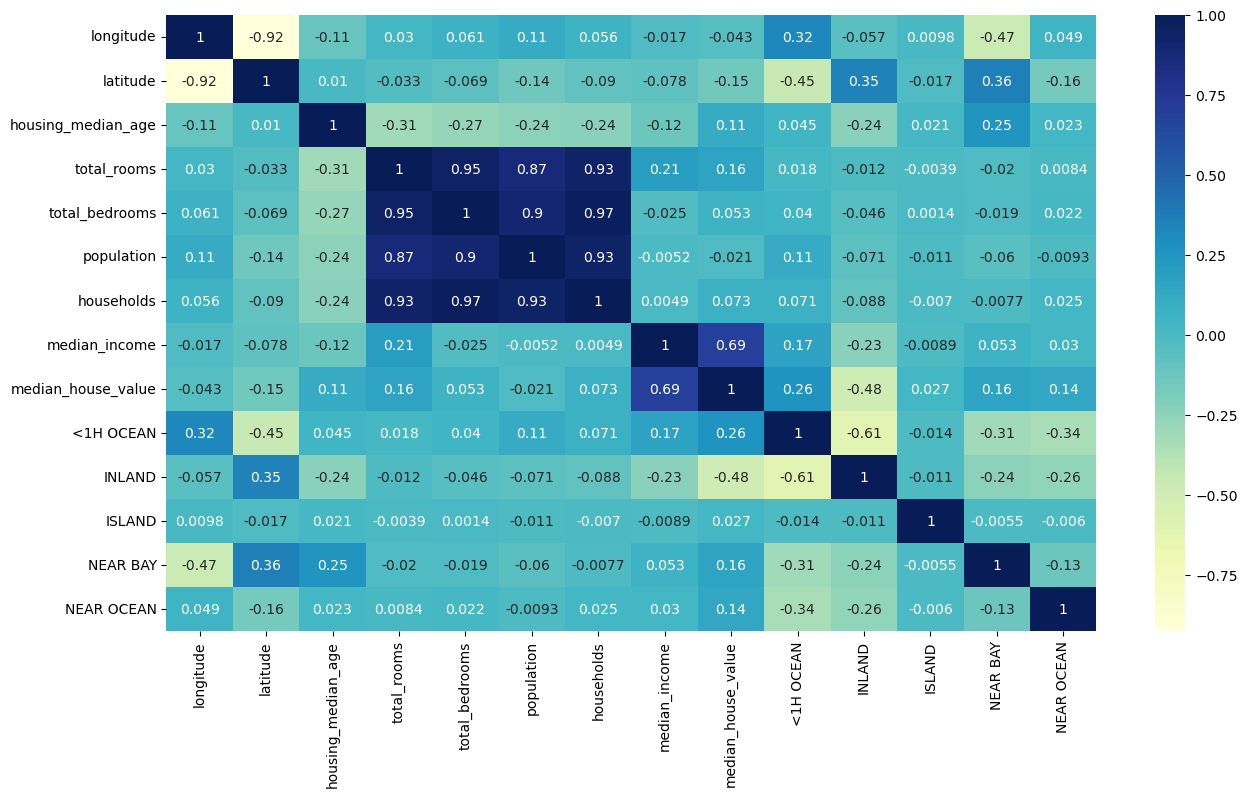

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

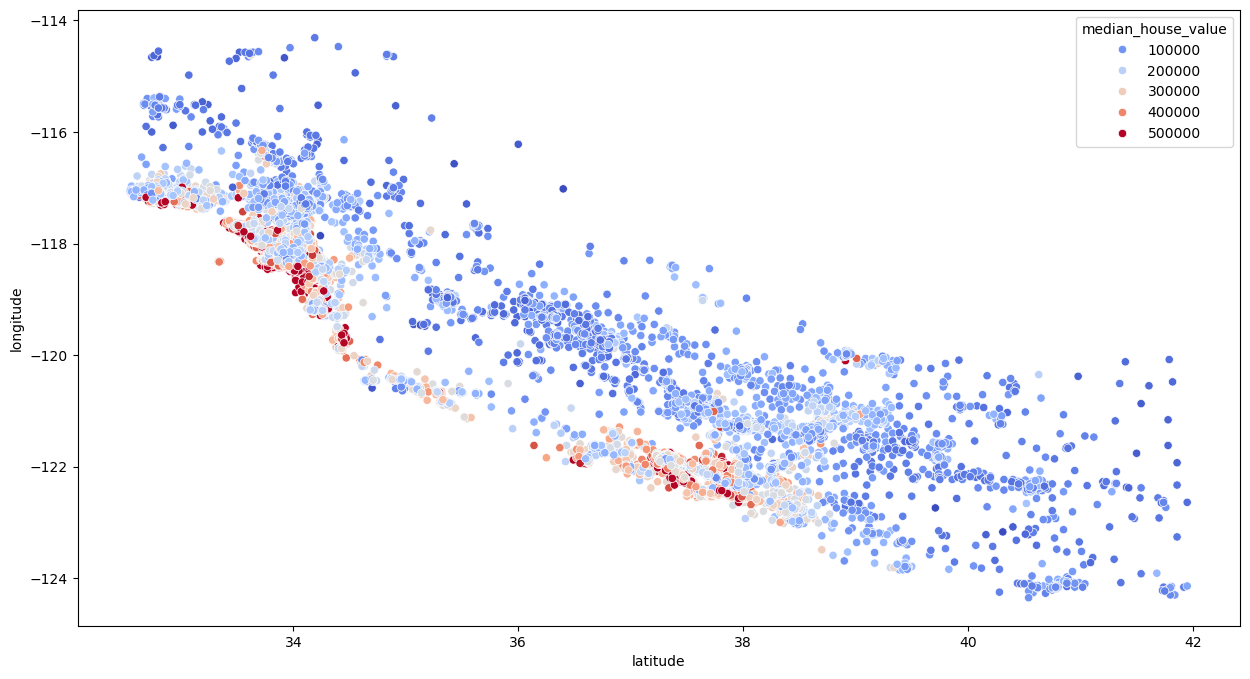

In [12]:
#THE BELOW SCATTERPLOT SHOWS US PRICE OF THE HOUSE WHEN IT GETS CLOSER TO THE BEACH
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [13]:
#FEATURES
train_data['bedroom_ratio']=train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms'] / train_data['households']


<Axes: >

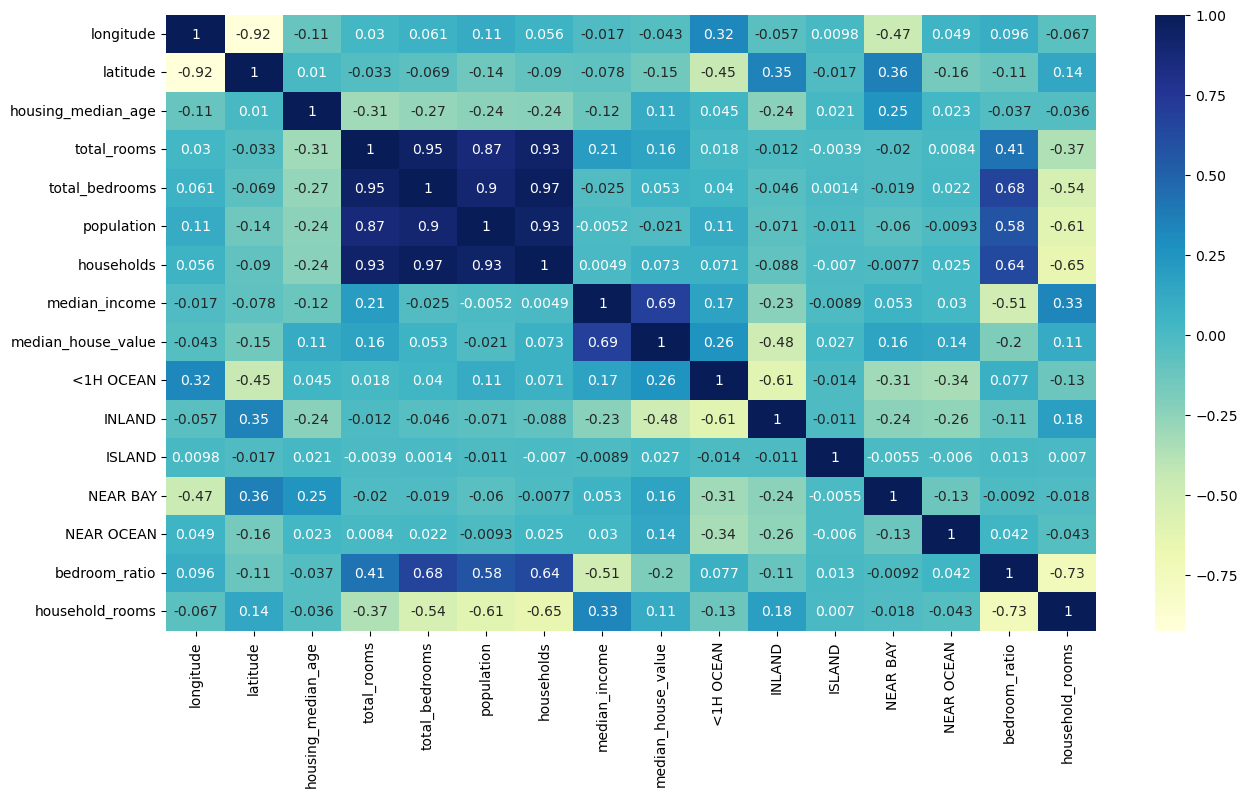

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu")

SIMPLE LINEAR REGRESSION MODEL

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train,y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [20]:
test_data = X_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms'] / test_data['households']



In [21]:
X_test,y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [33]:
X_test_s = scaler.transform(X_test)

In [35]:
reg.score(X_test,y_test)

0.682285662093696

RANDOM FOREST ALGORITHM

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,y_train)

RandomForestRegressor()

In [42]:
forest.score(X_test,y_test)

0.8243905376677938

In [56]:
from sklearn.model_selection import GridSearchCV

forest=RandomForestRegressor()
param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [58]:
grid_search.best_estimator_.score(X_test,y_test)

0.8253682728624181

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Initialize the Random Forest Regressor
forest = RandomForestRegressor()

# Fit the model on the training data
forest.fit(X_train, y_train)
# For Linear Regression
y_pred_lr = reg.predict(X_test)
print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R^2:", r2_score(y_test, y_pred_lr))

# For Random Forest
y_pred_rf = forest.predict(X_test)
print("Random Forest Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R^2:", r2_score(y_test, y_pred_rf))

Linear Regression Metrics:
MAE: 47093.61820843962
MSE: 4271231991.085738
R^2: 0.682285662093696
Random Forest Metrics:
MAE: 31606.395568876927
MSE: 2332327762.603174
R^2: 0.8265104839956037
